In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('vaccine.csv')
df.head()

In [ ]:
df=df.drop(['unique_id'],axis=1)

In [ ]:
df.dropna()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [ ]:
df.drop('has_health_insur',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [ ]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

#### BAR PLOT

Text(0.5, 1.0, 'barplot of h1n1_vaccine')

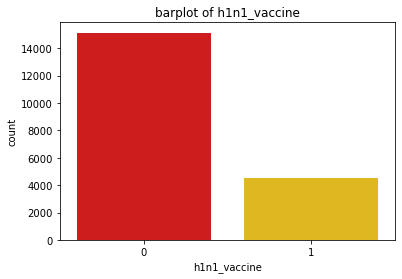

In [ ]:
sns.countplot(x='h1n1_vaccine',data=df,palette='hot')
plt.title("barplot of h1n1_vaccine")

#### HISTOGRAM

Text(0.5, 1.0, 'Histogram for h1n1_worry')

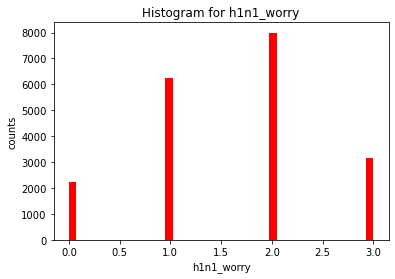

In [ ]:
plt.hist(df.h1n1_worry,bins='auto',facecolor='red')
plt.xlabel("h1n1_worry")
plt.ylabel("counts")
plt.title("Histogram for h1n1_worry")

#### BOX PLOT

<AxesSubplot:>

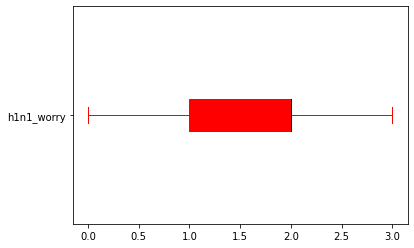

In [ ]:
p=dict(boxes='red',whiskers='green',medians='black',caps='red')
df['h1n1_worry'].plot.box(color=p,patch_artist=True,vert=False)

#### lets check if h1n1_worry a good predictor

In [ ]:
#hypothesis testing
mod=ols('h1n1_worry~h1n1_vaccine',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    278.817902  278.817902  359.846071  1.564062e-79
Residual      19640.0  15217.572282    0.774825         NaN           NaN


##### p value is less then 0.05 hence it is a good predictor

#### lets check if h1n1_awareness a good predictor

In [ ]:
#hypothesis testing
mod=ols('h1n1_awareness~h1n1_vaccine',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                   df       sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0   110.644675  110.644675  316.210167  3.441770e-70
Residual      19640.0  6872.206002    0.349909         NaN           NaN


##### P value is less then 0.05 hence it is a good predictor

In [ ]:
#hypothesis testing
mod=ols('antiviral_medication~h1n1_vaccine',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                   df      sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0    1.209693  1.209693  25.77419  3.872929e-07
Residual      19640.0  921.789034  0.046934       NaN           NaN


##### P value is less then 0.05 hence it is a good predictor

In [ ]:
#hypothesis testing
mod=ols('contact_avoidance~h1n1_vaccine',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                   df       sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0     7.325788  7.325788  38.18928  6.546853e-10
Residual      19640.0  3767.509362  0.191828       NaN           NaN


##### P value is less then 0.05 hence it is a good predictor

In [ ]:
#hypothesis testing
mod=ols('bought_face_mask~h1n1_vaccine',data=df).fit()
aov_table=sm.stats.anova_lm(mod)
print(aov_table)

                   df       sum_sq   mean_sq           F        PR(>F)
h1n1_vaccine      1.0     7.031149  7.031149  112.004583  4.191407e-26
Residual      19640.0  1232.911830  0.062776         NaN           NaN


##### P value is less then 0.05 hence it is a good predictor¶

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols
for col in df.columns:
    if col != 'h1n1_vaccine':
        formula = f'{col} ~ h1n1_vaccine'
        mod = ols(formula, data=df).fit()
        aov = sm.stats.anova_lm(mod)
        print(f"ANOVA for {col}:\n", aov)


ANOVA for h1n1_worry:
                    df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    278.817902  278.817902  359.846071  1.564062e-79
Residual      19640.0  15217.572282    0.774825         NaN           NaN
ANOVA for h1n1_awareness:
                    df       sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0   110.644675  110.644675  316.210167  3.441770e-70
Residual      19640.0  6872.206002    0.349909         NaN           NaN
ANOVA for antiviral_medication:
                    df      sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0    1.209693  1.209693  25.77419  3.872929e-07
Residual      19640.0  921.789034  0.046934       NaN           NaN
ANOVA for contact_avoidance:
                    df       sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0     7.325788  7.325788  38.18928  6.546853e-10
Residual      19640.0  3767.509362  0.191828       NaN           NaN
ANOVA for bought_face_mask:
       

ValueError: endog has evaluated to an array with multiple columns that has shape (19642, 5). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
df.antiviral_medication.value_counts()

0.0    18671
1.0      971
Name: antiviral_medication, dtype: int64

### h1n1_awareness [0,1,2] ordered


In [ ]:
df.h1n1_awareness.value_counts()

1.0    10861
2.0     7362
0.0     1419
Name: h1n1_awareness, dtype: int64

Text(0.5, 1.0, 'Histogram of h1n1_awareness')

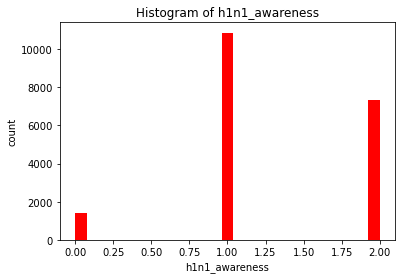

In [ ]:
plt.hist(df.h1n1_awareness, bins='auto', facecolor='red')
plt.xlabel('h1n1_awareness')
plt.ylabel('count')
plt.title('Histogram of h1n1_awareness')

<AxesSubplot:>

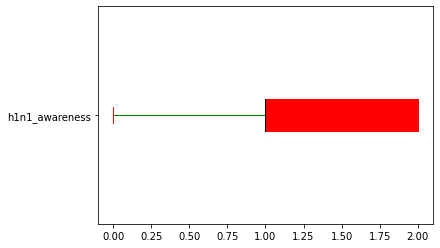

In [ ]:
props2=dict(boxes='red', whiskers='green', medians='black', caps='red')
df['h1n1_awareness'].plot.box(color=props2, patch_artist=True, vert=False)

Text(0.5, 1.0, 'Barplot of h1n1_awareness')

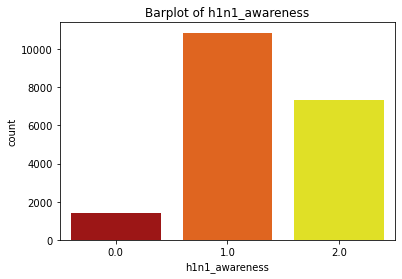

In [ ]:
sns.countplot(x='h1n1_awareness', data=df , palette='hot')
plt.title('Barplot of h1n1_awareness')

### antiviral_medication [0 and 1]

In [ ]:
df.antiviral_medication.isnull().sum()

0

In [ ]:
df.antiviral_medication.value_counts()

0.0    18671
1.0      971
Name: antiviral_medication, dtype: int64

Text(0.5, 1.0, 'Barplot of antiviral_medication')

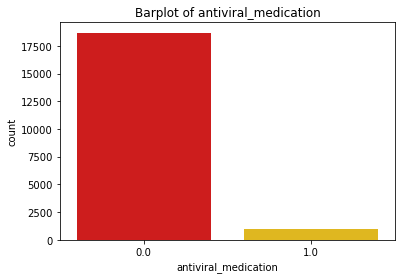

In [ ]:
sns.countplot(x='antiviral_medication', data=df , palette='hot')
plt.title('Barplot of antiviral_medication')

In [ ]:
ct_antiviral=pd.crosstab(df.h1n1_vaccine,df.antiviral_medication)
chi2_contingency(ct_antiviral,correction=False)

(25.7430310280289,
 3.900328532557542e-07,
 1,
 array([[14380.14906832,   747.85093168],
        [ 4290.85093168,   223.14906832]]))

### contact_avoidance [0 and 1]

In [ ]:
df.contact_avoidance.isnull().sum()

0

In [ ]:
df.contact_avoidance.value_counts()

1.0    14544
0.0     5098
Name: contact_avoidance, dtype: int64

Text(0.5, 1.0, 'Barplot of contact_avoidance')

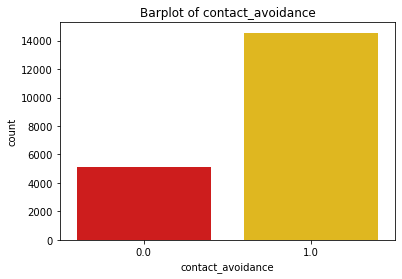

In [ ]:
sns.countplot(x='contact_avoidance', data=df , palette='hot')
plt.title('Barplot of contact_avoidance')

In [ ]:
ct_contact=pd.crosstab(df.h1n1_vaccine,df.contact_avoidance)
chi2_contingency(ct_contact,correction=False)

(38.119047488867295,
 6.655721920427935e-10,
 1,
 array([[ 3926.40993789, 11201.59006211],
        [ 1171.59006211,  3342.40993789]]))

### bought_face_mask [0 and 1]

In [ ]:
df.bought_face_mask.isnull().sum()

0

In [ ]:
df.bought_face_mask.value_counts()

0.0    18312
1.0     1330
Name: bought_face_mask, dtype: int64

Text(0.5, 1.0, 'Barplot of bought_face_mask')

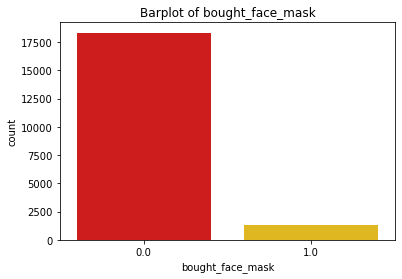

In [ ]:
sns.countplot(x='bought_face_mask', data=df , palette='hot')
plt.title('Barplot of bought_face_mask')

In [ ]:
ct_mask=pd.crosstab(df.h1n1_vaccine, df.bought_face_mask)
chi2_contingency(ct_mask, correction = False)

(111.38079745607507,
 4.8829999983371125e-26,
 1,
 array([[14103.65217391,  1024.34782609],
        [ 4208.34782609,   305.65217391]]))

### wash_hands_frequently [0 and 1]

In [ ]:
df.wash_hands_frequently.isnull().sum()

0

In [ ]:
df.wash_hands_frequently.value_counts()

1.0    16399
0.0     3243
Name: wash_hands_frequently, dtype: int64

Text(0.5, 1.0, 'Barplot of wash_hands_frequently')

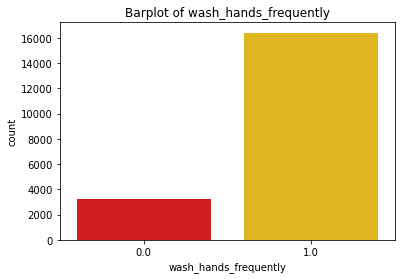

In [ ]:
sns.countplot(x='wash_hands_frequently', data=df , palette='hot')
plt.title('Barplot of wash_hands_frequently')

In [ ]:
ct_wash=pd.crosstab(df.h1n1_vaccine, df.wash_hands_frequently)
chi2_contingency(ct_wash, correction = False)

(111.62137100015417,
 4.32500265148964e-26,
 1,
 array([[ 2497.71428571, 12630.28571429],
        [  745.28571429,  3768.71428571]]))

### avoid_large_gatherings [0 and 1]

In [ ]:
df.avoid_large_gatherings.isnull().sum()

0

In [ ]:
df.avoid_large_gatherings.value_counts()

0.0    12703
1.0     6939
Name: avoid_large_gatherings, dtype: int64

Text(0.5, 1.0, 'Barplot of avoid_large_gatherings')

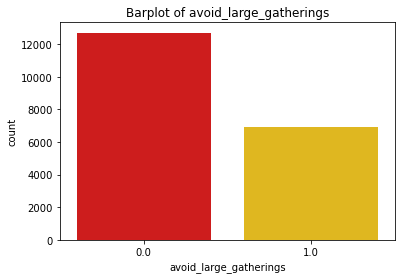

In [ ]:
sns.countplot(x='avoid_large_gatherings', data=df , palette='hot')
plt.title('Barplot of avoid_large_gatherings')

In [ ]:
ct_gath=pd.crosstab(df.h1n1_vaccine, df.avoid_large_gatherings)
chi2_contingency(ct_gath, correction = False)

(8.326019959345679,
 0.003908118862931521,
 1,
 array([[9783.67701863, 5344.32298137],
        [2919.32298137, 1594.67701863]]))

### reduced_outside_home_cont [0 and 1]

In [ ]:
df.reduced_outside_home_cont.isnull().sum()

0

In [ ]:
df.reduced_outside_home_cont.value_counts()

0.0    13159
1.0     6483
Name: reduced_outside_home_cont, dtype: int64

Text(0.5, 1.0, 'Barplot of reduced_outside_home_cont')

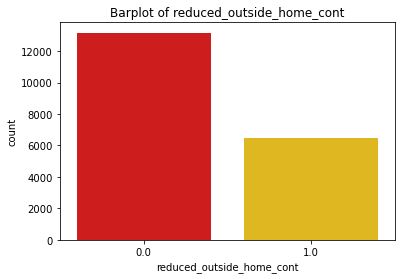

In [ ]:
sns.countplot(x='reduced_outside_home_cont', data=df , palette='hot')
plt.title('Barplot of reduced_outside_home_cont')

In [ ]:
ct_outside=pd.crosstab(df.h1n1_vaccine, df.reduced_outside_home_cont)
chi2_contingency(ct_outside, correction = False)

(5.859941970831115,
 0.015489304669565737,
 1,
 array([[10134.88198758,  4993.11801242],
        [ 3024.11801242,  1489.88198758]]))

### avoid_touch_face [0 and 1]

In [ ]:
df.avoid_touch_face.isnull().sum()

0

In [ ]:
df.avoid_touch_face.value_counts()

1.0    13455
0.0     6187
Name: avoid_touch_face, dtype: int64

Text(0.5, 1.0, 'Barplot of avoid_touch_face')

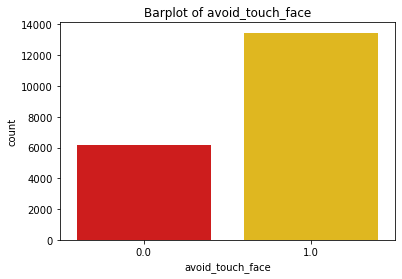

In [ ]:
sns.countplot(x='avoid_touch_face', data=df , palette='hot')
plt.title('Barplot of avoid_touch_face')

In [ ]:
ct_face=pd.crosstab(df.h1n1_vaccine, df.avoid_touch_face)
chi2_contingency(ct_face, correction = False)

(99.97660321127165,
 1.5420802703508326e-23,
 1,
 array([[ 4765.14285714, 10362.85714286],
        [ 1421.85714286,  3092.14285714]]))

### dr_recc_h1n1_vacc [0 and 1]

In [ ]:
df.dr_recc_h1n1_vacc.isnull().sum()

0

In [ ]:
df.dr_recc_h1n1_vacc.value_counts()

0.0    15203
1.0     4439
Name: dr_recc_h1n1_vacc, dtype: int64

Text(0.5, 1.0, 'Barplot of dr_recc_h1n1_vacc')

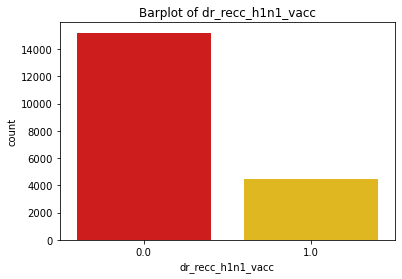

In [ ]:
sns.countplot(x='dr_recc_h1n1_vacc', data=df , palette='hot')
plt.title('Barplot of dr_recc_h1n1_vacc')

In [ ]:
ct_face=pd.crosstab(df.h1n1_vaccine, df.dr_recc_h1n1_vacc)
chi2_contingency(ct_face, correction = False)

(3094.6916755786597,
 0.0,
 1,
 array([[11709.14285714,  3418.85714286],
        [ 3493.85714286,  1020.14285714]]))

### dr_recc_seasonal_vacc [0 and 1]

In [ ]:
df.dr_recc_seasonal_vacc.isnull().sum()

0

In [ ]:
df.dr_recc_seasonal_vacc.value_counts()

0.0    13091
1.0     6551
Name: dr_recc_seasonal_vacc, dtype: int64

Text(0.5, 1.0, 'Barplot of dr_recc_seasonal_vacc')

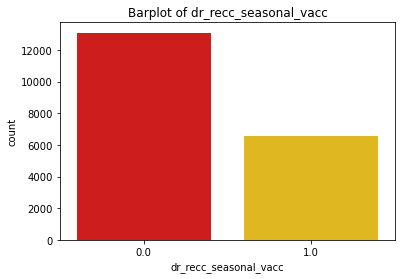

In [ ]:
sns.countplot(x='dr_recc_seasonal_vacc', data=df , palette='hot')
plt.title('Barplot of dr_recc_seasonal_vacc')

In [ ]:
ct_face=pd.crosstab(df.h1n1_vaccine, df.dr_recc_seasonal_vacc)
chi2_contingency(ct_face, correction = False)

(875.3779473401858,
 2.21025047497519e-192,
 1,
 array([[10082.50931677,  5045.49068323],
        [ 3008.49068323,  1505.50931677]]))

### chronic_medic_condition [0 and 1]

In [ ]:
df.chronic_medic_condition.isnull().sum()

0

In [ ]:
df.chronic_medic_condition.value_counts()

0.0    14066
1.0     5576
Name: chronic_medic_condition, dtype: int64

Text(0.5, 1.0, 'Barplot of chronic_medic_condition')

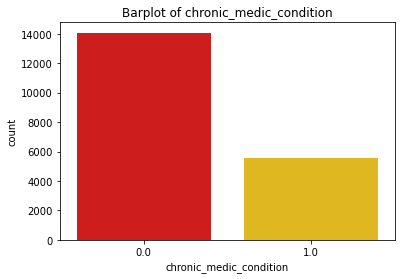

In [ ]:
sns.countplot(x='chronic_medic_condition', data=df , palette='hot')
plt.title('Barplot of chronic_medic_condition')

In [ ]:
ct_face=pd.crosstab(df.h1n1_vaccine, df.chronic_medic_condition)
chi2_contingency(ct_face, correction = False)

(219.14944840010486,
 1.3864754403096512e-49,
 1,
 array([[10833.44099379,  4294.55900621],
        [ 3232.55900621,  1281.44099379]]))

### cont_child_undr_6_mnths [0 and 1]

In [ ]:
df.cont_child_undr_6_mnths.isnull().sum()

0

In [ ]:
df.cont_child_undr_6_mnths.value_counts()

0.0    17995
1.0     1647
Name: cont_child_undr_6_mnths, dtype: int64

Text(0.5, 1.0, 'Barplot of cont_child_undr_6_mnths')

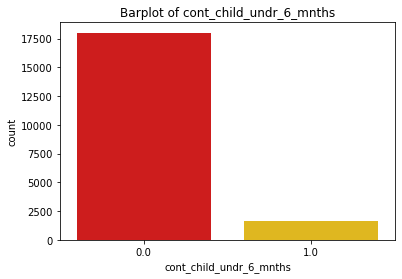

In [ ]:
sns.countplot(x='cont_child_undr_6_mnths', data=df , palette='hot')
plt.title('Barplot of cont_child_undr_6_mnths')

In [ ]:
ct_face=pd.crosstab(df.h1n1_vaccine, df.cont_child_undr_6_mnths)
chi2_contingency(ct_face, correction = False)

(110.12378230842235,
 9.205896231946304e-26,
 1,
 array([[13859.50310559,  1268.49689441],
        [ 4135.49689441,   378.50310559]]))

### is_health_worker [0 and 1]

In [ ]:
df.is_health_worker.isnull().sum()

0

In [ ]:
df.is_health_worker.value_counts()

0.0    17310
1.0     2332
Name: is_health_worker, dtype: int64

Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

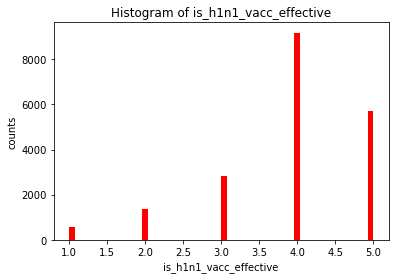

In [ ]:
plt.hist(df.is_h1n1_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_h1n1_vacc_effective')
plt.ylabel('counts')
plt.title('Histogram of is_h1n1_vacc_effective')

<AxesSubplot:>

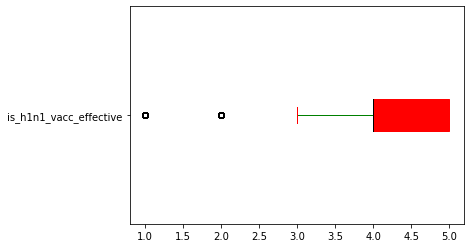

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['is_h1n1_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
# few outliers on lower side; IGNORE!
df.is_h1n1_vacc_effective.isnull().sum() #0 Missing values
df.is_h1n1_vacc_effective.value_counts()

4.0    9172
5.0    5715
3.0    2838
2.0    1347
1.0     570
Name: is_h1n1_vacc_effective, dtype: int64

Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

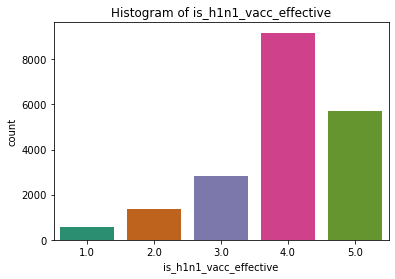

In [ ]:
sns.countplot(x = 'is_h1n1_vacc_effective', data = df, palette = 'Dark2')
plt.title('Histogram of is_h1n1_vacc_effective')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('is_h1n1_vacc_effective ~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   1411.109998  1411.109998  1579.950867     0.0
Residual      19640.0  17541.178618     0.893135          NaN     NaN


In [ ]:
mod = ols('is_h1n1_risky ~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   4134.782428  4134.782428  2838.602067     0.0
Residual      19640.0  28608.140543     1.456626          NaN     NaN


Text(0.5, 1.0, 'Histogram of sick_from_h1n1_vacc')

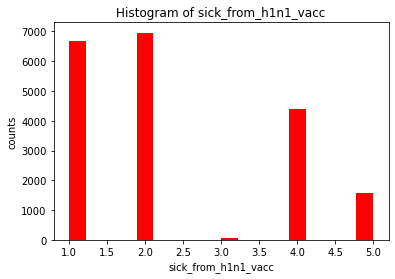

In [ ]:
plt.hist(df.sick_from_h1n1_vacc, bins = 'auto', facecolor = 'red')
plt.xlabel('sick_from_h1n1_vacc')
plt.ylabel('counts')
plt.title('Histogram of sick_from_h1n1_vacc')

<AxesSubplot:>

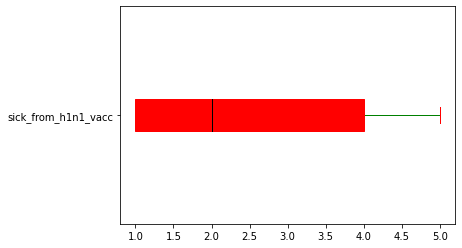

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['sick_from_h1n1_vacc'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
df.sick_from_h1n1_vacc.isnull().sum()
df.sick_from_h1n1_vacc.value_counts()

2.0    6956
1.0    6684
4.0    4390
5.0    1560
3.0      52
Name: sick_from_h1n1_vacc, dtype: int64

In [ ]:
mod = ols(' sick_from_h1n1_vacc~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    246.018980  246.018980  135.282692  3.623260e-31
Residual      19640.0  35716.414988    1.818555         NaN           NaN


Text(0.5, 1.0, 'Histogram of is_seas_vacc_effective')

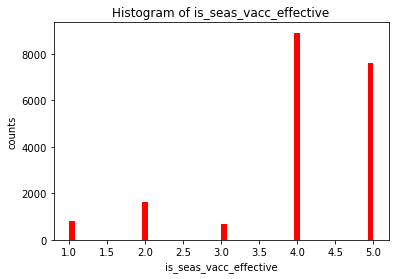

In [ ]:
plt.hist(df.is_seas_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_seas_vacc_effective')
plt.ylabel('counts')
plt.title('Histogram of is_seas_vacc_effective')

<AxesSubplot:>

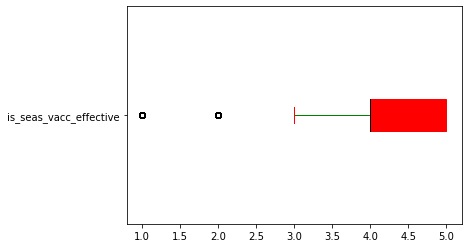

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['is_seas_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
df.is_seas_vacc_effective.isnull().sum()
df.is_seas_vacc_effective.value_counts()

4.0    8906
5.0    7603
2.0    1638
1.0     822
3.0     673
Name: is_seas_vacc_effective, dtype: int64

In [ ]:
mod = ols('is_seas_vacc_effective~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq     mean_sq           F         PR(>F)
h1n1_vaccine      1.0    763.264159  763.264159  700.789605  9.196705e-152
Residual      19640.0  21390.882466    1.089149         NaN            NaN


Text(0.5, 1.0, 'Histogram of is_seas_risky')

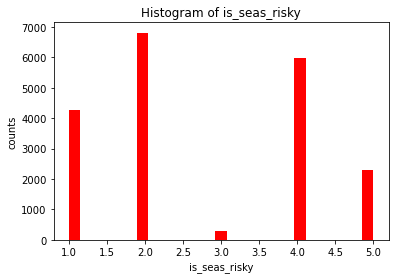

In [ ]:
plt.hist(df.is_seas_risky, bins = 'auto', facecolor = 'red')
plt.xlabel('is_seas_risky')
plt.ylabel('counts')
plt.title('Histogram of is_seas_risky')

<AxesSubplot:>

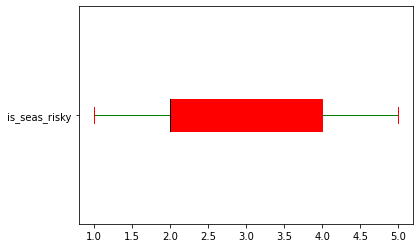

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['is_seas_risky'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
df.is_seas_risky.isnull().sum()
df.is_seas_risky.value_counts()

2.0    6811
4.0    5984
1.0    4258
5.0    2286
3.0     303
Name: is_seas_risky, dtype: int64

In [ ]:
mod = ols('is_seas_risky~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   2938.840524  2938.840524  1655.101131     0.0
Residual      19640.0  34873.293730     1.775626          NaN     NaN


Text(0.5, 1.0, 'Histogram of sick_from_seas_vacc')

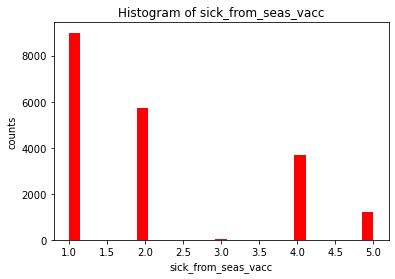

In [ ]:
plt.hist(df.sick_from_seas_vacc, bins = 'auto', facecolor = 'red')
plt.xlabel('sick_from_seas_vacc')
plt.ylabel('counts')
plt.title('Histogram of sick_from_seas_vacc')

<AxesSubplot:>

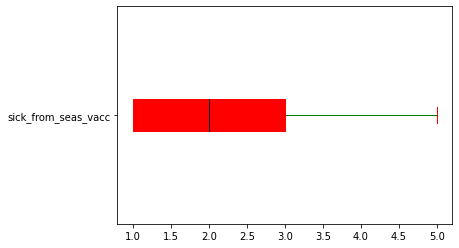

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['sick_from_seas_vacc'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
df.sick_from_seas_vacc.isnull().sum()
df.sick_from_seas_vacc.value_counts()

1.0    8996
2.0    5713
4.0    3683
5.0    1221
3.0      29
Name: sick_from_seas_vacc, dtype: int64

In [ ]:
mod = ols('sick_from_seas_vacc~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      1.496253  1.496253  0.851088  0.356256
Residual      19640.0  34528.036789  1.758047       NaN       NaN


In [ ]:
df['age_bracket'] = df.get('age_bracket').replace('65+ Years', 5)
df['age_bracket'] = df.get('age_bracket').replace('55 - 64 Years', 4)
df['age_bracket'] = df.get('age_bracket').replace('45 - 54 Years', 3)
df['age_bracket'] = df.get('age_bracket').replace('18 - 34 Years', 1)
df['age_bracket'] = df.get('age_bracket').replace('35 - 44 Years', 2)

In [ ]:
df.age_bracket.isnull().sum()
df.age_bracket.value_counts()

5    4491
4    4234
3    4038
1    3925
2    2954
Name: age_bracket, dtype: int64

<AxesSubplot:>

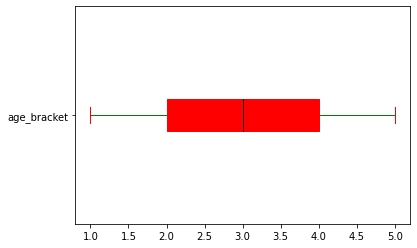

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['age_bracket'].plot.box(color=props2, patch_artist = True, vert = False)

Text(0.5, 1.0, 'Barplot of age bracket')

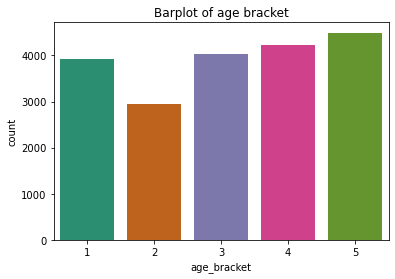

In [ ]:
sns.countplot(x = 'age_bracket', data = df ,palette = 'Dark2')
plt.title('Barplot of age bracket')

In [ ]:
mod = ols('age_bracket~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0     84.712087  84.712087  41.109469  1.472151e-10
Residual      19640.0  40471.098931   2.060647        NaN           NaN


### qualification-object, ordered -3 levels

Text(0.5, 1.0, 'Barplot of qualification')

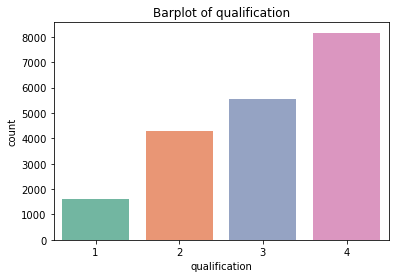

In [ ]:
df.qualification.isnull().sum()
df.qualification.value_counts()


df['qualification'] =df.get('qualification').replace('College Graduate', 4)
df['qualification'] =df.get('qualification').replace('Some College', 3)
df['qualification'] =df.get('qualification').replace('12 Years', 2)
df['qualification'] =df.get('qualification').replace('< 12 Years', 1)

df.qualification.value_counts()
sns.countplot(x = 'qualification', data = df,palette = 'Set2')
plt.title('Barplot of qualification')

In [ ]:
mod = ols('qualification~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0     91.618704  91.618704  95.612329  1.572981e-22
Residual      19640.0  18819.658151   0.958231        NaN           NaN


### race - object ,nominal

In [ ]:
df.race.isnull().sum()
df.race.value_counts()

White                15745
Black                 1474
Hispanic              1295
Other or Multiple     1128
Name: race, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['race']= le.fit_transform(df['race'])
df.race.value_counts()

3    15745
0     1474
1     1295
2     1128
Name: race, dtype: int64

Text(0.5, 1.0, 'Histogram of race')

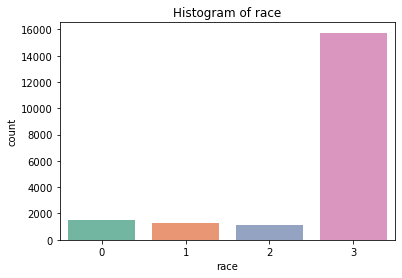

In [ ]:
sns.countplot(x = 'race', data = df,palette = 'Set2')
plt.title('Histogram of race')

In [ ]:
from scipy.stats import chi2_contingency
ct_race = pd.crosstab(df.h1n1_vaccine, df.race)
chi2_contingency (ct_race, correction = False)

(47.734514060409225,
 2.425304962460163e-10,
 3,
 array([[ 1135.25465839,   997.39130435,   868.77018634, 12126.58385093],
        [  338.74534161,   297.60869565,   259.22981366,  3618.41614907]]))

### sex - object[female,male]

In [ ]:
df.sex.isnull().sum()
df.sex.value_counts()

Female    11638
Male       8004
Name: sex, dtype: int64

In [ ]:
df['sex']= le.fit_transform(df['sex'])
df.sex.value_counts()

0    11638
1     8004
Name: sex, dtype: int64

Text(0.5, 1.0, 'Histogram of sex')

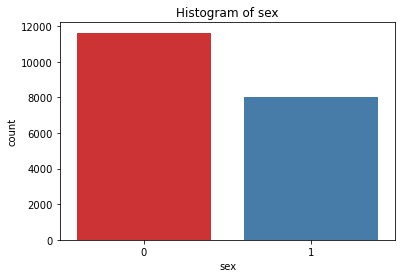

In [ ]:
sns.countplot(x = 'sex', data = df,palette = 'Set1')
plt.title('Histogram of sex')

In [ ]:
from scipy.stats import chi2_contingency
ct_sex = pd.crosstab(df.h1n1_vaccine, df.sex)
chi2_contingency (ct_sex, correction = False)

(12.498872792045749,
 0.0004071976301199202,
 1,
 array([[8963.42857143, 6164.57142857],
        [2674.57142857, 1839.42857143]]))

### income_level -object,ordered

In [ ]:
df.income_level.isnull().sum()
df.income_level.value_counts()

<= $75,000, Above Poverty    11185
> $75,000                     6159
Below Poverty                 2298
Name: income_level, dtype: int64

In [ ]:
df['income_level']=df.get('income_level').replace('Below Poverty', 1)
df['income_level']=df.get('income_level').replace('<= $75,000, Above Poverty',2)
df['income_level']=df.get('income_level').replace('> $75,000', 3)
df.income_level.value_counts()

2    11185
3     6159
1     2298
Name: income_level, dtype: int64

Text(0.5, 1.0, 'Histogram of income_level')

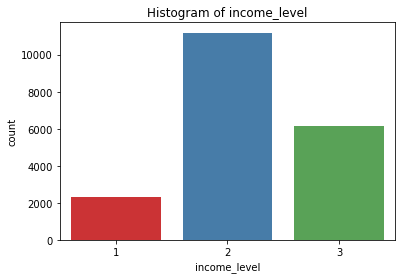

In [ ]:
sns.countplot(x = 'income_level', data = df,palette = 'Set1')
plt.title('Histogram of income_level')

In [ ]:
from scipy.stats import chi2_contingency
ct_income_level = pd.crosstab(df.h1n1_vaccine, df.income_level)
chi2_contingency (ct_income_level, correction = False)

(69.46798035099587,
 8.226587707809212e-16,
 2,
 array([[1769.88819876, 8614.53416149, 4743.57763975],
        [ 528.11180124, 2570.46583851, 1415.42236025]]))

### marital_status -object[0,1]

In [ ]:
df.marital_status.isnull().sum()
df.marital_status.value_counts()

Married        10768
Not Married     8874
Name: marital_status, dtype: int64

In [ ]:
df['marital_status']= le.fit_transform(df['marital_status'])
df.marital_status.value_counts()

0    10768
1     8874
Name: marital_status, dtype: int64

Text(0.5, 1.0, 'Histogram of marital_status')

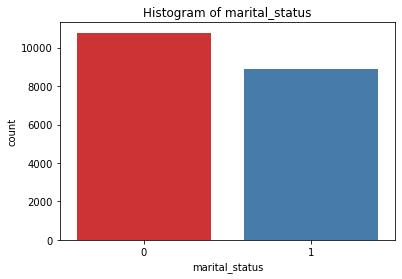

In [ ]:
sns.countplot(x = 'marital_status', data = df,palette = 'Set1')
plt.title('Histogram of marital_status')

In [ ]:
from scipy.stats import chi2_contingency
ct_marital_status = pd.crosstab(df.marital_status, df.marital_status)
chi2_contingency (ct_marital_status, correction = False)

(19641.999999999996,
 0.0,
 1,
 array([[5903.15772325, 4864.84227675],
        [4864.84227675, 4009.15772325]]))

### housing_status - object [own,rent]

In [ ]:
df.housing_status.isnull().sum()
df.housing_status.value_counts()

Own     14980
Rent     4662
Name: housing_status, dtype: int64

In [ ]:
df['housing_status']= le.fit_transform(df['housing_status'])
df.housing_status.value_counts()

0    14980
1     4662
Name: housing_status, dtype: int64

Text(0.5, 1.0, 'Histogram of housing_status')

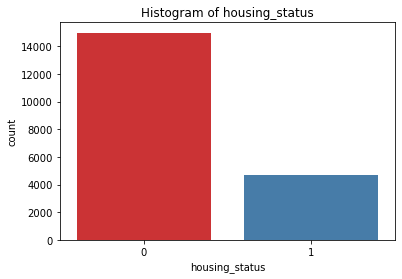

In [ ]:
sns.countplot(x = 'housing_status', data = df,palette = 'Set1')
plt.title('Histogram of housing_status')

In [ ]:
from scipy.stats import chi2_contingency
ct_housing_status = pd.crosstab(df.housing_status, df.housing_status)
chi2_contingency (ct_housing_status, correction = False)

(19642.0,
 0.0,
 1,
 array([[11424.5188881,  3555.4811119],
        [ 3555.4811119,  1106.5188881]]))

### employment - object , ordered 3levels

In [ ]:
df.employment.isnull().sum()
df.employment.value_counts()

Employed              11093
Not in Labor Force     7417
Unemployed             1132
Name: employment, dtype: int64

In [ ]:
df['employment']=df.get('employment').replace('Employed', 3)
df['employment']=df.get('employment').replace('Not in Labor Force',2)
df['employment']=df.get('employment').replace('Unemployed', 1)
df.employment.value_counts()

3    11093
2     7417
1     1132
Name: employment, dtype: int64

Text(0.5, 1.0, 'Histogram of employment')

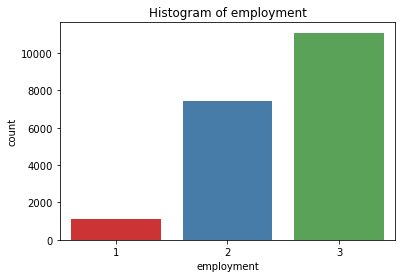

In [ ]:
sns.countplot(x = 'employment', data = df,palette = 'Set1')
plt.title('Histogram of employment')

In [ ]:
mod = ols('employment~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df       sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0     2.168418  2.168418  5.938608  0.014822
Residual      19640.0  7171.333720  0.365139       NaN       NaN


### census_msa - object, 3 levels, nominal

In [ ]:
df.census_msa.isnull().sum()
df.census_msa.value_counts()

MSA, Not Principle  City    8571
MSA, Principle City         5717
Non-MSA                     5354
Name: census_msa, dtype: int64

In [ ]:
df['census_msa']= le.fit_transform(df['census_msa'])
df.census_msa.value_counts()

0    8571
1    5717
2    5354
Name: census_msa, dtype: int64

Text(0.5, 1.0, 'Histogram of census_msa')

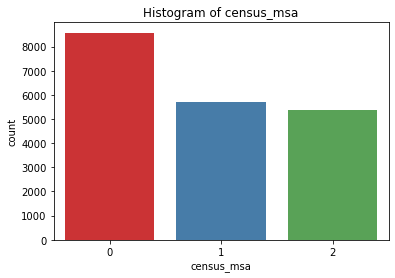

In [ ]:
sns.countplot(x = 'census_msa', data = df,palette = 'Set1')
plt.title('Histogram of census_msa')

In [ ]:
from scipy.stats import chi2_contingency
ct_census_msa = pd.crosstab(df.census_msa, df.census_msa)
chi2_contingency (ct_census_msa, correction = False)

(39284.0,
 0.0,
 4,
 array([[3740.04892577, 2494.67503309, 2336.27604114],
        [2494.67503309, 1663.98986865, 1558.33509826],
        [2336.27604114, 1558.33509826, 1459.3888606 ]]))

### no_of_adults - ordered

In [ ]:
df.no_of_adults.isnull().sum()
df.no_of_adults.value_counts()

1.0    11006
0.0     5683
2.0     2124
3.0      829
Name: no_of_adults, dtype: int64

Text(0.5, 1.0, 'Histogram of no_of_adults')

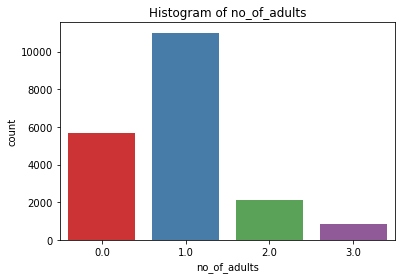

In [ ]:
sns.countplot(x = 'no_of_adults', data = df,palette = 'Set1')
plt.title('Histogram of no_of_adults')

In [ ]:
mod = ols('no_of_adults~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq   mean_sq        F    PR(>F)
h1n1_vaccine      1.0      0.192588  0.192588  0.34578  0.556518
Residual      19640.0  10938.824060  0.556967      NaN       NaN


### no_of_children - orderded

In [ ]:
df.no_of_children.isnull().sum()
df.no_of_children.value_counts()

0.0    13697
1.0     2402
2.0     2207
3.0     1336
Name: no_of_children, dtype: int64

Text(0.5, 1.0, 'Histogram of no_of_children')

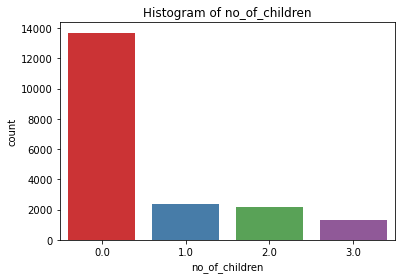

In [ ]:
sns.countplot(x = 'no_of_children', data = df,palette = 'Set1')
plt.title('Histogram of no_of_children')

In [ ]:
mod = ols('no_of_children~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      0.202039  0.202039  0.229512  0.631891
Residual      19640.0  17289.080722  0.880299       NaN       NaN


In [ ]:
hn=df.drop(['sick_from_seas_vacc','census_msa','no_of_adults','no_of_children'],axis=1)
hn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [ ]:
df4=pd.get_dummies(hn.race,drop_first=True,prefix='race')
hnd=pd.concat([hn,df],axis=1)

In [ ]:
hnc=hnd.drop(['race'],axis=1)
hnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

### Check VIF for each features

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

x = hnc.iloc[:, [1,2,15,16,17,18,19,20,21,23,26]]
x = x.dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

                   feature        VIF
0           h1n1_awareness   6.326902
1     antiviral_medication   1.077988
2            is_h1n1_risky   7.166750
3      sick_from_h1n1_vacc   4.307004
4   is_seas_vacc_effective  14.170557
5            is_seas_risky   8.012743
6              age_bracket   5.253674
7            qualification   9.285438
8                      sex   1.638125
9           marital_status   1.752107
10            h1n1_vaccine   1.508542


In [ ]:
columns_to_drop = ['is_h1n1_vacc_effective', 'is_seas_vacc_effective', 'qualification', 'employment']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

### Trget Variable(y) - 'h1n1_vaccine'

In [ ]:
X = df.loc[:, df.columns != 'h1n1_vaccine']
y= df.loc[:, df.columns == 'h1n1_vaccine']

In [ ]:
# One-hot encode categorical features in X
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_encoded = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)


### Fitting the model

In [ ]:
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred = model1.predict(X_test)

### Confusion Matrix

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[2829  201]
 [ 512  387]]


### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 81.85%


### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3030
           1       0.66      0.43      0.52       899

    accuracy                           0.82      3929
   macro avg       0.75      0.68      0.70      3929
weighted avg       0.80      0.82      0.80      3929



### ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model1.predict_proba(X_test)[:,1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)  # Calculate Area Under the Curve (AUC)
print(roc_auc)

0.8151033234580409


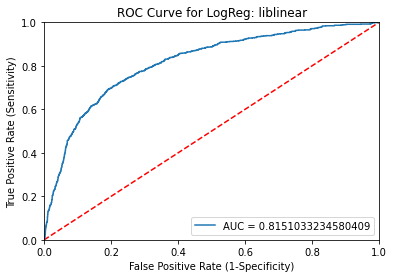

In [ ]:
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.plot(fpr, tpr, label='AUC = ' + str(roc_auc))

plt.legend(loc=4)
plt.show()

# LAB 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc

In [ ]:
df = pd.read_csv('diabetes[1].csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Preprocessing

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Fit Logistic Regression Model

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

### Model Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



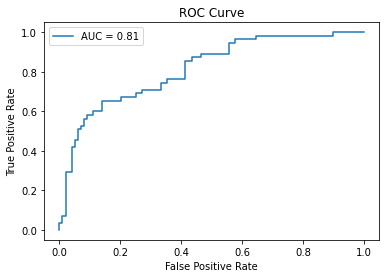

In [ ]:
# ROC Curve
y_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Check for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
print(vif_data)

                    Feature        VIF
0               Pregnancies   3.275748
1                   Glucose  16.725078
2             BloodPressure  14.619512
3             SkinThickness   4.008696
4                   Insulin   2.063689
5                       BMI  18.408884
6  DiabetesPedigreeFunction   3.195626
7                       Age  13.492985


### Cross-Validation

In [ ]:
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", np.mean(cv_scores))

Cross-validation accuracy: 0.7682624564977505


### Regularization with Ridge and Lasso

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
# Ridge (L2) Regularization
ridge = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear')
ridge.fit(X_train, y_train)
print("Ridge Accuracy:", accuracy_score(y_test, ridge.predict(X_test)))

Ridge Accuracy: 0.7532467532467533


In [ ]:
# Lasso (L1) Regularization
lasso = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')
lasso.fit(X_train, y_train)
print("Lasso Accuracy:", accuracy_score(y_test, lasso.predict(X_test)))

Lasso Accuracy: 0.7597402597402597


### Feature Importance with Lasso

In [ ]:
lasso_coefficients = pd.Series(lasso.coef_[0], index=X.columns)
important_features = lasso_coefficients[lasso_coefficients != 0]
print("Important Features:", important_features)

Important Features: Pregnancies                 0.190372
Glucose                     1.014080
BloodPressure              -0.192416
Insulin                    -0.142976
BMI                         0.730881
DiabetesPedigreeFunction    0.200259
Age                         0.388991
dtype: float64


### Feature Importance with Ridge

In [ ]:
ridge_coefficients = pd.Series(ridge.coef_[0], index=X.columns)
important_features = ridge_coefficients[ridge_coefficients != 0]
print("Important Features:", important_features)

Important Features: Pregnancies                 0.213597
Glucose                     1.090624
BloodPressure              -0.256441
SkinThickness               0.048405
Insulin                    -0.210460
BMI                         0.792738
DiabetesPedigreeFunction    0.233600
Age                         0.425960
dtype: float64
